# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['albany', 'arraial do cabo', 'rikitea', 'chabahar', 'lavrentiya', 'puerto ayora', 'pisco', 'rio grande', 'betare oya', 'mys shmidta', 'shima', 'kuche', 'cherskiy', 'kudahuvadhoo', 'ondjiva', 'thompson', 'naze', 'punta arenas', 'vaini', 'illoqqortoormiut', 'gizo', 'khipro', 'busselton', 'jamestown', 'sentyabrskiy', 'cabedelo', 'chokurdakh', 'kropotkin', 'bethel', 'jequitinhonha', 'nishihara', 'abha', 'mataura', 'hithadhoo', 'ushuaia', 'cape town', 'khatanga', 'barrow', 'port hawkesbury', 'norman wells', 'dikson', 'yellowknife', 'chagda', 'sobolevo', 'grande-riviere', 'hasaki', 'georgetown', 'taolanaro', 'hermanus', 'asau', 'barguzin', 'east london', 'victoria', 'iqaluit', 'hilo', 'chimbote', 'luderitz', 'tasiilaq', 'pevek', 'burica', 'hobart', 'bengkulu', 'cidreira', 'fairbanks', 'yumen', 'tuktoyaktuk', 'codrington', 'vardo', 'kapaa', 'qaanaaq', 'kruisfontein', 'pacasmayo', 'nikolskoye', 'kalomo', 'carnarvon', 'lasa', 'ponta do sol', 'goedereede', 'mar del plata', 'dhidhdhoo', 'faanui'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
from datetime import date
import json


base_url = "http://api.openweathermap.org/data/2.5/weather?"
latList=[]
longList = []
maxTemps =[]
humidities = []
cloudiness = []
windSpeed = []
countries = []
dates= []

set = 1
counter = 0

for x in range(0,len(cities)):
    city = cities[x]
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    counter += 1
    if counter > 50:
        counter = 0
        set += 1
    #print log
    print(f'Processing Record {counter} of Set {set} | {city}')


    #Cities list already complete, gather rest of data with exception handling
    try:    
        latList.append(weather_json['coord']['lat'])
        longList.append(weather_json['coord']['lon'])
    except Exception as e:
        print(f'Record {x} of set {set}: Coordinates not found.')
        latList.append('NA')
        longList.append('NA')
    try:      
        maxTemps.append(weather_json['main']['temp_max'])
    except Exception as e:
        print(f'Record {x} of set {set}: Max Temp not found.')
        maxTemps.append('NA')
    try:  
        humidities.append(weather_json['main']['humidity'])
    except Exception as e:
        print(f'Record {x} of set {set}: Humidity not found.')
        humidities.append('NA')
    try:  
        cloudiness.append(weather_json['clouds']['all'])
    except Exception as e:
        print(f'Record {x} of set {set}: Cloudiness not found.')
        cloudiness.append('NA')
    try:  
        windSpeed.append(weather_json['wind']['speed'])
    except Exception as e:
        print(f'Record {x} of set {set}: Wind Speed not found.')
        windSpeed.append('NA')
    try:  
        countries.append(weather_json['sys']['country'])
    except Exception as e:
        print(f'Record {x} of set {set}: Country not found.')
        countries.append('NA')
    try:  
        dates.append(weather_json['dt'])
    except Exception as e:
        print(f'Record {x} of set {set}: Date not found.')
        dates.append('NA')
    
    

print('--------Data Retrieval Complete------')

Processing Record 0 of Set 1 | albany
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | chabahar
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | betare oya
Processing Record 9 of Set 1 | mys shmidta
Record 9 of set 1: Coordinates not found.
Record 9 of set 1: Max Temp not found.
Record 9 of set 1: Humidity not found.
Record 9 of set 1: Cloudiness not found.
Record 9 of set 1: Wind Speed not found.
Record 9 of set 1: Country not found.
Record 9 of set 1: Date not found.
Processing Record 10 of Set 1 | shima
Processing Record 11 of Set 1 | kuche
Record 11 of set 1: Coordinates not found.
Record 11 of set 1: Max Temp not found.
Record 11 of set 1: Humidity not found.
Record 11 of set 1: Cloudiness not found.
Record 11 of set 1: Wind Speed not found.
Record 11 of set 1: Country 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame({
    'City':cities,
    'Lat': latList,
    'Lon':longList,
    'Max Temp': maxTemps,
    'Humidity': humidities,
    'Cloudiness': cloudiness,
    'Wind Speed': windSpeed,
    'Country': countries,
    'Date': dates
})

# print(len(cities))
# print(len(latList))
# print(len(longList))
# print(len(maxTemps))
# print(len(humidities))
# print(len(cloudiness))
# print(len(windSpeed))
# print(len(countries))
# print(len(dates))
df.to_csv('../output_data/cities.csv')


In [8]:
df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,289.45,69,0,2.61,US,1662084006
1,arraial do cabo,-22.9661,-42.0278,293.03,79,0,11.42,BR,1662084078
2,rikitea,-23.1203,-134.9692,295.7,70,1,4.51,PF,1662084079
3,chabahar,25.2919,60.643,299.74,83,32,2.16,IR,1662084079
4,lavrentiya,65.5833,-171,279.66,83,100,6.4,RU,1662084080


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
excludeNA_df =  df.loc[(df['Lat']!= 'NA')]

In [10]:
#  Get the indices of cities that have humidity over 100%.
overHumid_df = excludeNA_df.loc[(excludeNA_df['Humidity'] > 100 )]
overHumid_df


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:

#skipping step, no output here

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

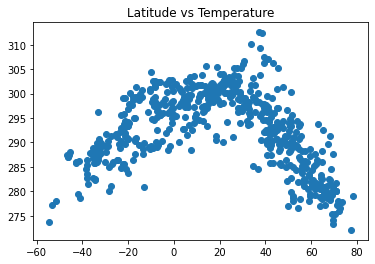

In [33]:
cleanLats = excludeNA_df['Lat']
cleanTemps = excludeNA_df['Max Temp']

plt.scatter(cleanLats,cleanTemps)
plt.title('Latitude vs Temperature')

plt.savefig("../Images/latTemp.png")



In Tracking Latitude vs Temperature, we see that the highest temperatures can be found around the equator.

## Latitude vs. Humidity Plot

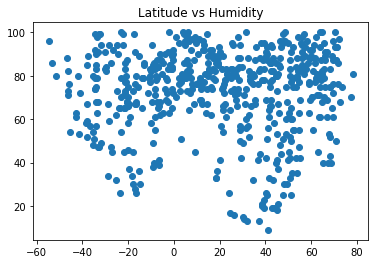

In [34]:
cleanHum= excludeNA_df['Humidity']

plt.scatter(cleanLats,cleanHum)
plt.title('Latitude vs Humidity')

plt.savefig("../Images/latHum.png")

In Tracking Latitude vs Humidity, we see that most latitudes at this time will have 70-100% humidity

## Latitude vs. Cloudiness Plot

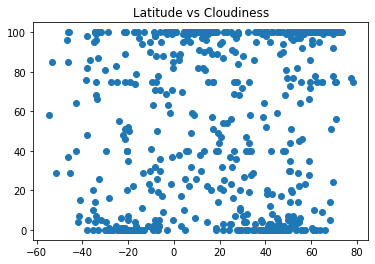

In [35]:
cleanClouds = excludeNA_df['Cloudiness']
plt.scatter(cleanLats,cleanClouds)
plt.title('Latitude vs Cloudiness')

plt.savefig("../Images/latCloud.png")

In Tracking Latitude vs Cloudiness, we see that most latitudes at this time will have either no cloudiness or full cloudiness.

## Latitude vs. Wind Speed Plot

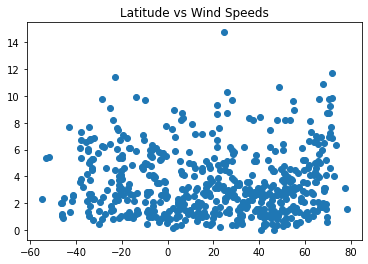

In [36]:
cleanWind = excludeNA_df['Wind Speed']
plt.scatter(cleanLats,cleanWind)
plt.title('Latitude vs Wind Speeds')

plt.savefig("../Images/latWind.png")

In Tracking Latitude vs Wind Speeds, we see that most areas have not high wind speeds.

## Linear Regression

In [15]:
def lineregressMap(x_values, y_values):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

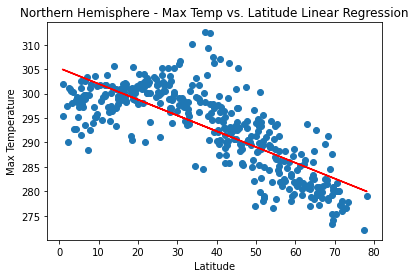

In [52]:
# Northern is Latitude >=  0
northern_df = excludeNA_df.loc[excludeNA_df['Lat'] >= 0]
x_values = northern_df['Lat'].astype(float)
y_values = northern_df['Max Temp'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../Images/NlatTemp.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

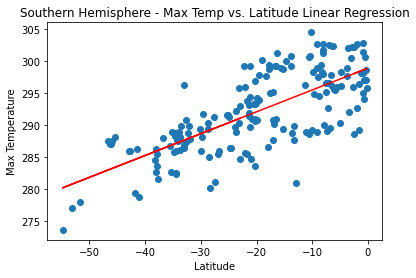

In [51]:
#souther lat <= 0

southern_df = excludeNA_df.loc[excludeNA_df['Lat'] <= 0]
x_values = southern_df['Lat'].astype(float)
y_values = southern_df['Max Temp'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../Images/SlatWind.png")
plt.show()



In looking at the difference in Northern vs Southern hemispheres, there seems to be an inverse correlation in temperatures respective to each hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

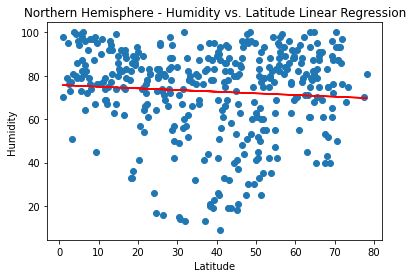

In [50]:
# Northern is Latitude >=  0
northern_df = excludeNA_df.loc[excludeNA_df['Lat'] >= 0]
x_values = northern_df['Lat'].astype(float)
y_values = northern_df['Humidity'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../Images/NlatHumpng")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

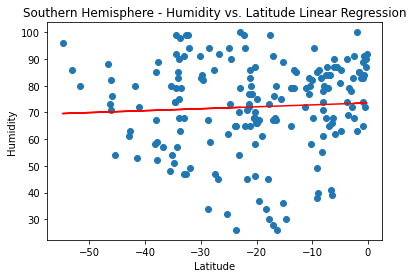

In [49]:
#souther lat <= 0

southern_df = excludeNA_df.loc[excludeNA_df['Lat'] <= 0]
x_values = southern_df['Lat'].astype(float)
y_values = southern_df['Humidity'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../Images/SlatHum.png")
plt.show()



In looking at the difference in Northern vs Southern hemispheres, latitudes seem to not make a strong difference in humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

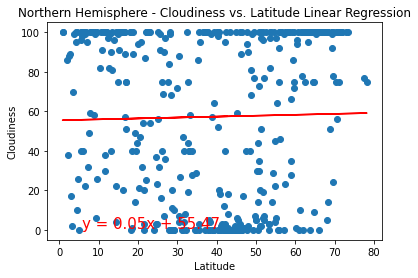

In [48]:
# Northern is Latitude >=  0
northern_df = excludeNA_df.loc[excludeNA_df['Lat'] >= 0]
x_values = northern_df['Lat'].astype(float)
y_values = northern_df['Cloudiness'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../Images/NlatCloud.png")
plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

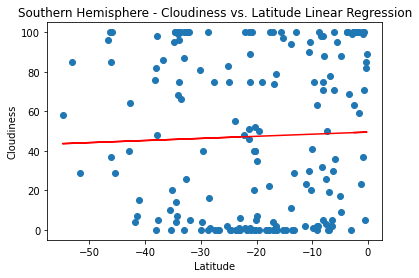

In [47]:
#souther lat <= 0

southern_df = excludeNA_df.loc[excludeNA_df['Lat'] <= 0]
x_values = southern_df['Lat'].astype(float)
y_values = southern_df['Cloudiness'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../Images/SlatCloud.png")
plt.show()



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In looking at the difference in Northern vs Southern hemispheres, the Northern hemisphere has slighter more cloudiness than the southern hemisphere.

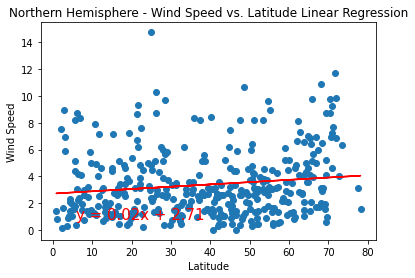

In [46]:
# Northern is Latitude >=  0
northern_df = excludeNA_df.loc[excludeNA_df['Lat'] >= 0]
x_values = northern_df['Lat'].astype(float)
y_values = northern_df['Wind Speed'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

plt.savefig("../Images/NlatWind.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

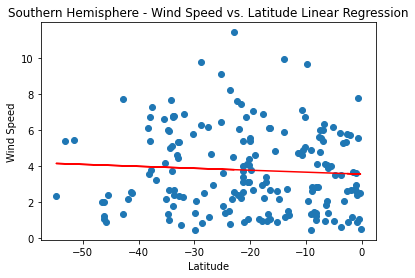

In [45]:
#souther lat <= 0

southern_df = excludeNA_df.loc[excludeNA_df['Lat'] <= 0]
x_values = southern_df['Lat'].astype(float)
y_values = southern_df['Wind Speed'].astype(float)

lineregressMap(x_values,y_values)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("../Images/SlatWind.png")
plt.show()


In looking at the difference in Northern vs Southern hemispheres, there seems to be much more data in the Northern hemisphere for wind speed.